##### Good evening Sir/Madam,
            My name is Gauripriya Kakati. I have tried my hands on the dataset you provided. So lets get into the code.

#### First we import the required files and we then read the dataset which is in csv format.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.figure_factory as ff
from colorama import Fore

In [3]:
from sklearn.preprocessing import MinMaxScaler

## We first begin with EURJPY Historical Data

In [4]:
eurj = pd.read_csv('EURJPY_historical_data.csv', skiprows=1, index_col=False)

#### Then we try to understand what the dataset consists of.

In [5]:
eurj.head()

Date     Open     High      Low    Close  Change(Pips)  \
0  07/09/2021 00:00  130.077  130.175  130.046  130.125           4.8   
1  07/08/2021 23:45  130.112  130.130  130.050  130.077          -3.5   
2  07/08/2021 23:30  130.073  130.130  130.072  130.113           4.0   
3  07/08/2021 23:15  130.050  130.058  130.035  130.047          -0.3   
4  07/08/2021 23:00  130.040  130.063  130.033  130.051           1.1   

   Change(%)  
0       0.04  
1      -0.03  
2       0.03  
3       0.00  
4       0.01

In [6]:
eurj.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object')

In [7]:
eurj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          385 non-null    object 
 1   Open          385 non-null    float64
 2   High          385 non-null    float64
 3   Low           385 non-null    float64
 4   Close         385 non-null    float64
 5   Change(Pips)  385 non-null    float64
 6   Change(%)     385 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.2+ KB


#### Here onwards i tried normalizing High and Low columns of Dataset as they tell us about the variation in the values and Open and Close are just the boundary values fixated by the owner. As we need to understand the variation in the data values and understand its ups and downs, the values of Highs and lows would be a perfect match.
I have used the MinMax Scalar method.

In [8]:
X = eurj[['High', 'Low']]
y = eurj[['Change(Pips)']]

In [9]:
X.head(2)

High      Low
0  130.175  130.046
1  130.130  130.050

In [10]:
scalar = MinMaxScaler()
scalar.fit(X)
new_data1 = scalar.transform(X)

In [11]:
new_data1

array([[0.18846154, 0.19250114],
       [0.16682692, 0.19433013],
       [0.16682692, 0.20438957],
       [0.13221154, 0.18747142],
       [0.13461538, 0.18655693],
       [0.14423077, 0.18747142],
       [0.13557692, 0.19158665],
       [0.1375    , 0.19524463],
       [0.13461538, 0.16963877],
       [0.11971154, 0.16460905],
       [0.11490385, 0.16643804],
       [0.10721154, 0.13717421],
       [0.09134615, 0.1390032 ],
       [0.11778846, 0.16735254],
       [0.10961538, 0.16643804],
       [0.11971154, 0.17283951],
       [0.13653846, 0.18106996],
       [0.13509615, 0.18609968],
       [0.15240385, 0.19250114],
       [0.14278846, 0.18381344],
       [0.13653846, 0.173754  ],
       [0.12836538, 0.16689529],
       [0.12259615, 0.17055327],
       [0.11586538, 0.16963877],
       [0.12692308, 0.17741198],
       [0.12836538, 0.17832647],
       [0.13221154, 0.18061271],
       [0.11826923, 0.16552355],
       [0.14086538, 0.16186557],
       [0.13894231, 0.18792867],
       [0.

#### Here are the normalised values.

In [81]:
dataframe1 = pd.DataFrame(new_data1, columns=['NewHigh', 'NewLow'])
print(dataframe1)

      NewHigh    NewLow
0    0.188462  0.192501
1    0.166827  0.194330
2    0.166827  0.204390
3    0.132212  0.187471
4    0.134615  0.186557
..        ...       ...
380  0.974038  0.963877
381  1.000000  0.967535
382  0.994712  1.000000
383  0.992308  0.989026
384  0.979327  0.971651

[385 rows x 2 columns]


#### The below two Distplots tell us about how the variation happens in the NewHigh values or the Normalised High values and the NewLow values or the Normalised Low values.

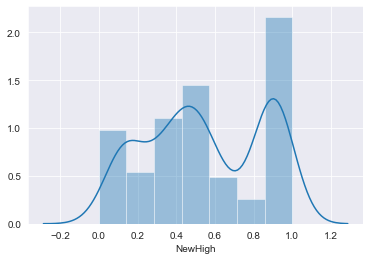

In [37]:
sns.set_style('darkgrid')
sns.distplot(dataframe1['NewHigh'])

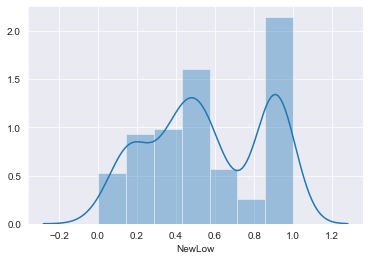

In [35]:
sns.set_style('darkgrid')
sns.distplot(dataframe1['NewLow'])

#### The below plots gives a thorough variation of all the column values and relation between them, about how they vary against eachother.

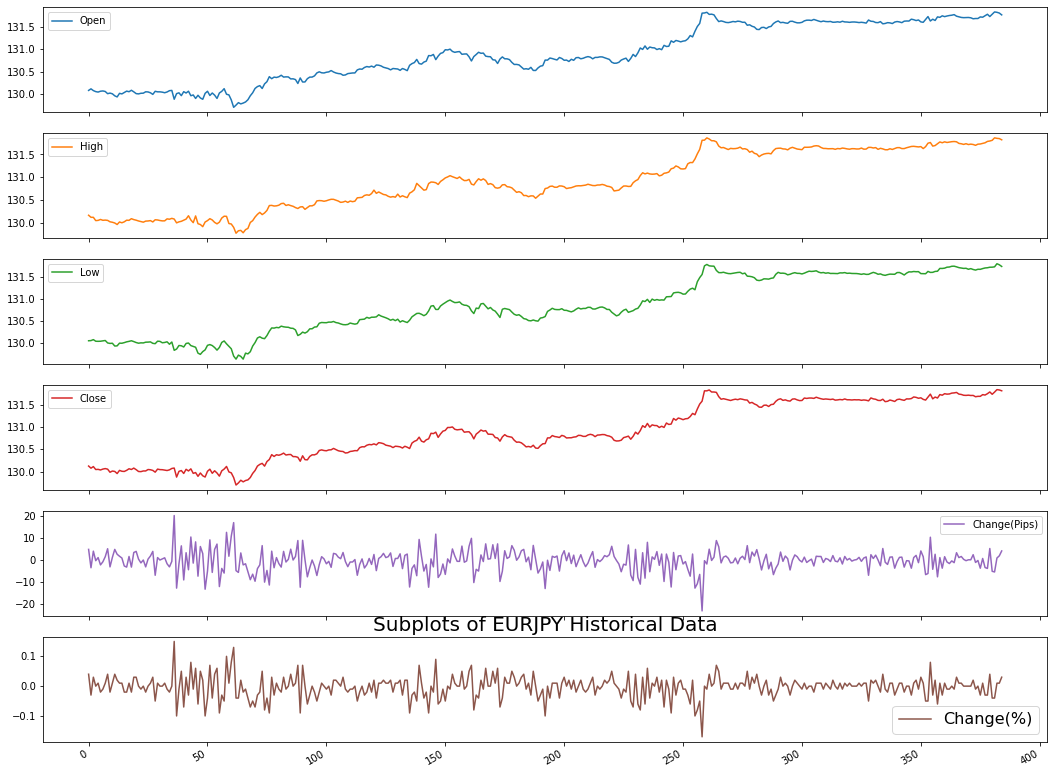

In [14]:
eurj.plot(subplots=True, figsize=(18,15))
plt.legend(fontsize=16)
plt.title('Subplots of EURJPY Historical Data', fontsize=20)
plt.show()

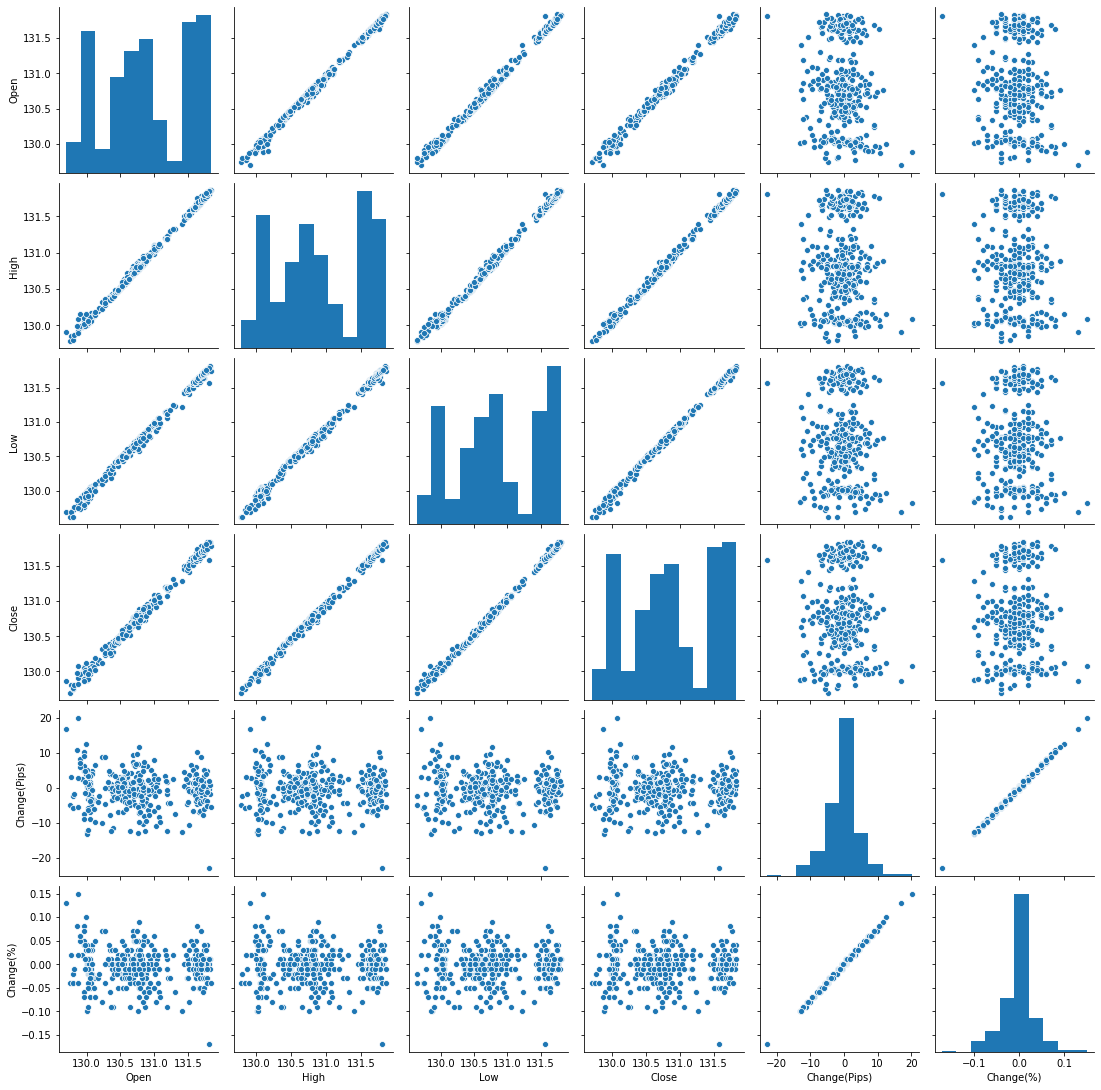

In [15]:
sns.pairplot(eurj)

#### Here is the variation between the High and Low values gives in the data set .ie., the values before being normalised.

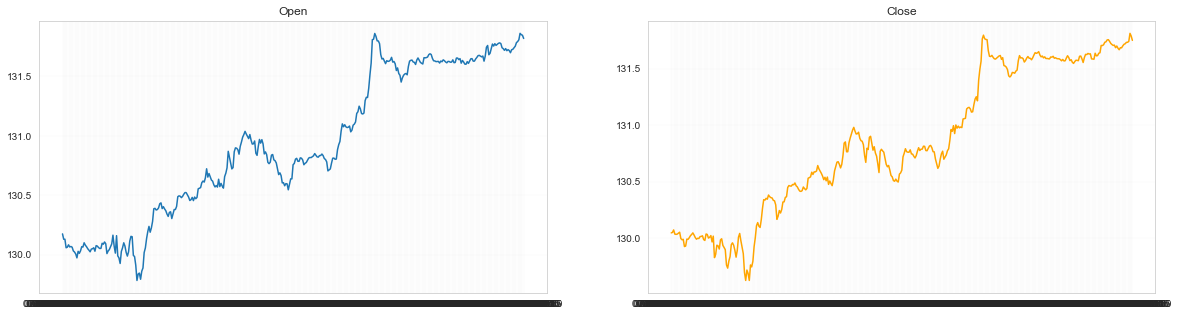

In [82]:
x1= eurj['Date']
y1= eurj['High']
z1= eurj['Low']

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
      
axes[0].plot(x1, y1)
axes[0].set_title("Open")
axes[0].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

axes[1].plot(x1, z1, color = 'orange')
axes[1].set_title("Close");
axes[1].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

#### The below 2 subplots tell us about the variation of the New High and Low values or the Normalised High and Low values.

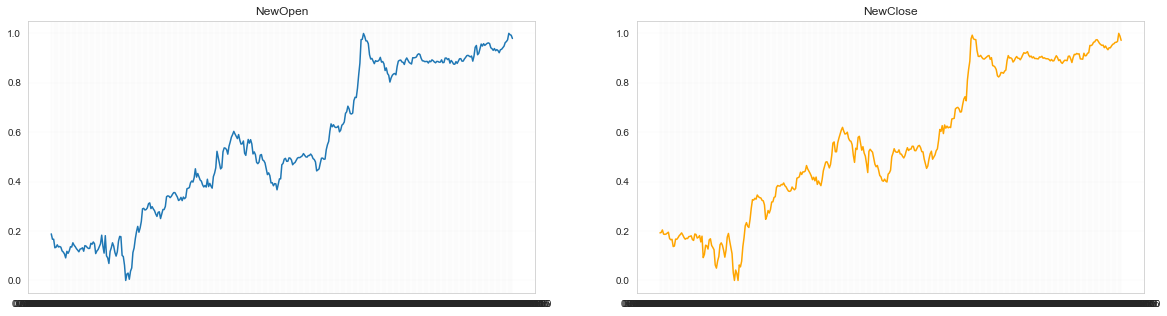

In [40]:
x4= eurj['Date']
y4= dataframe1['NewHigh']
z4= dataframe1['NewLow']

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
      
axes[0].plot(x4, y4)
axes[0].set_title("NewOpen")
axes[0].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

axes[1].plot(x4, z4, color = 'orange')
axes[1].set_title("NewClose");
axes[1].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

#### The above graphs did tell about the variation but to be more precise here is a more detailed plot of values that are not yet Normalised.

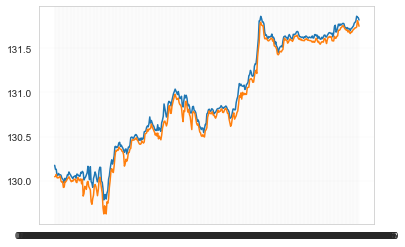

<Figure size 2160x576 with 0 Axes>

In [83]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,8))
ax.plot(x1,y1, x1,z1)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

#### we can see here in the normalised value plot that at initial the values vary alot with respect to eachother but later on they appear to be very close to eachother.

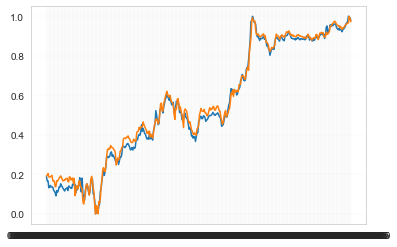

<Figure size 2160x576 with 0 Axes>

In [41]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,8))
ax.plot(x4,y4, x4,z4)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

#### This is the Correlation Graph of EURJPY Historical Data

Text(0.5, 1.0, 'EURJPY Historical Data Correlation')

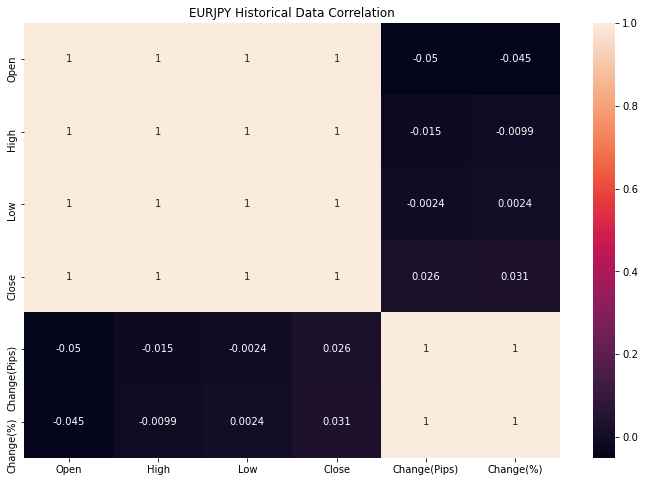

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(eurj.corr(),annot=True )
plt.title('EURJPY Historical Data Correlation')

#### Here is another representation of un-normalised High value's variation with respect to the Dates

In [19]:
fig = px.line(eurj, x='Date', y='High')
fig.update_xaxes(rangeslider_visible=True)

#### Here is another representation of un-normalised Low value's variation with respect to the Dates

In [20]:
fig = px.line(eurj, x='Date', y='Low')
fig.update_xaxes(rangeslider_visible=True)

## Here we begin with EURUSD Historical Data

In [21]:
euru = pd.read_csv('EURUSD_historical_data.csv', skiprows=1, index_col=False)

#### The same methods are followed.

In [22]:
euru.head()

Date     Open     High      Low    Close  Change(Pips)  \
0  07/09/2021 00:00  1.18466  1.18494  1.18449  1.18473           0.7   
1  07/08/2021 23:45  1.18471  1.18478  1.18459  1.18463          -0.8   
2  07/08/2021 23:30  1.18438  1.18478  1.18436  1.18471           3.3   
3  07/08/2021 23:15  1.18422  1.18426  1.18406  1.18426           0.4   
4  07/08/2021 23:00  1.18454  1.18464  1.18415  1.18424          -3.0   

   Change(%)  
0       0.01  
1      -0.01  
2       0.03  
3       0.00  
4      -0.03

In [23]:
euru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          385 non-null    object 
 1   Open          385 non-null    float64
 2   High          385 non-null    float64
 3   Low           385 non-null    float64
 4   Close         385 non-null    float64
 5   Change(Pips)  385 non-null    float64
 6   Change(%)     385 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.2+ KB


In [24]:
euru.head(3)

Date     Open     High      Low    Close  Change(Pips)  \
0  07/09/2021 00:00  1.18466  1.18494  1.18449  1.18473           0.7   
1  07/08/2021 23:45  1.18471  1.18478  1.18459  1.18463          -0.8   
2  07/08/2021 23:30  1.18438  1.18478  1.18436  1.18471           3.3   

   Change(%)  
0       0.01  
1      -0.01  
2       0.03

In [25]:
x= euru[['High', 'Low']]
y= euru['Change(Pips)']

In [26]:
scalar = MinMaxScaler()
scalar.fit(x)
newdata2 = scalar.transform(x)

In [27]:
newdata2

array([[0.57288765, 0.58325667],
       [0.55803157, 0.5924563 ],
       [0.55803157, 0.57129715],
       [0.5097493 , 0.54369825],
       [0.5450325 , 0.55197792],
       [0.55524605, 0.57957682],
       [0.5645311 , 0.59889604],
       [0.56731662, 0.60625575],
       [0.5645311 , 0.57681693],
       [0.545961  , 0.56853726],
       [0.54781801, 0.57405704],
       [0.53667595, 0.54461822],
       [0.53110492, 0.55197792],
       [0.54688951, 0.56209752],
       [0.53296193, 0.56393744],
       [0.54317549, 0.56669733],
       [0.56174559, 0.57313707],
       [0.56267409, 0.55381785],
       [0.545961  , 0.55473781],
       [0.52553389, 0.5400184 ],
       [0.50789229, 0.52713891],
       [0.50696379, 0.50873965],
       [0.46239554, 0.49126035],
       [0.47818013, 0.50229991],
       [0.48839369, 0.51793928],
       [0.48746518, 0.51977921],
       [0.48189415, 0.50781969],
       [0.48282266, 0.50873965],
       [0.54410399, 0.52345906],
       [0.52924791, 0.53265869],
       [0.

In [44]:
dataframe2 = pd.DataFrame(newdata2, columns=['NewHigh', 'NewLow'])
print(dataframe2)

      NewHigh    NewLow
0    0.572888  0.583257
1    0.558032  0.592456
2    0.558032  0.571297
3    0.509749  0.543698
4    0.545032  0.551978
..        ...       ...
380  0.654596  0.663293
381  0.675952  0.685373
382  0.677809  0.695492
383  0.680594  0.698252
384  0.654596  0.659614

[385 rows x 2 columns]


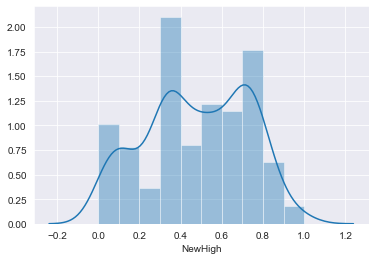

In [47]:
sns.set_style('darkgrid')
sns.distplot(dataframe2['NewHigh'])

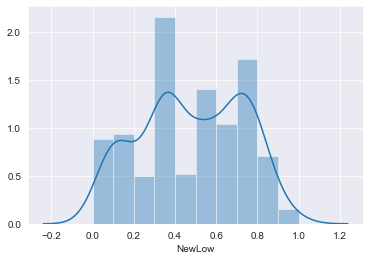

In [46]:
sns.set_style('darkgrid')
sns.distplot(dataframe2['NewLow'])

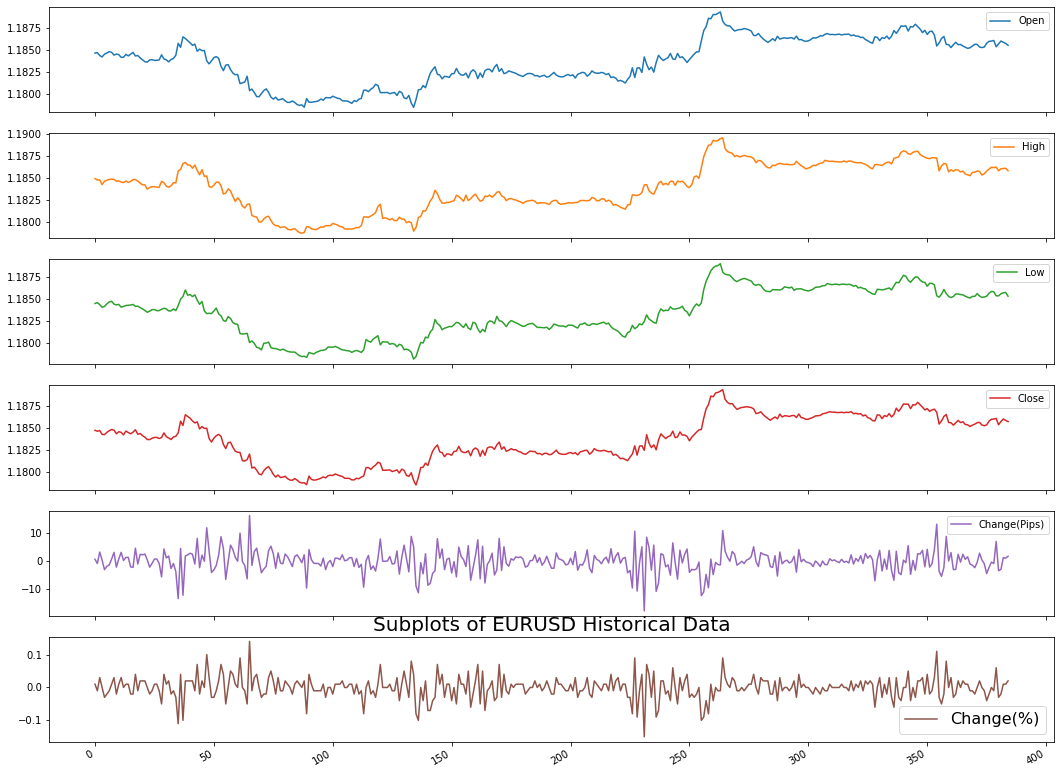

In [28]:
euru.plot(subplots=True, figsize=(18,15))
plt.legend(fontsize=16)
plt.title('Subplots of EURUSD Historical Data', fontsize=20)
plt.show()

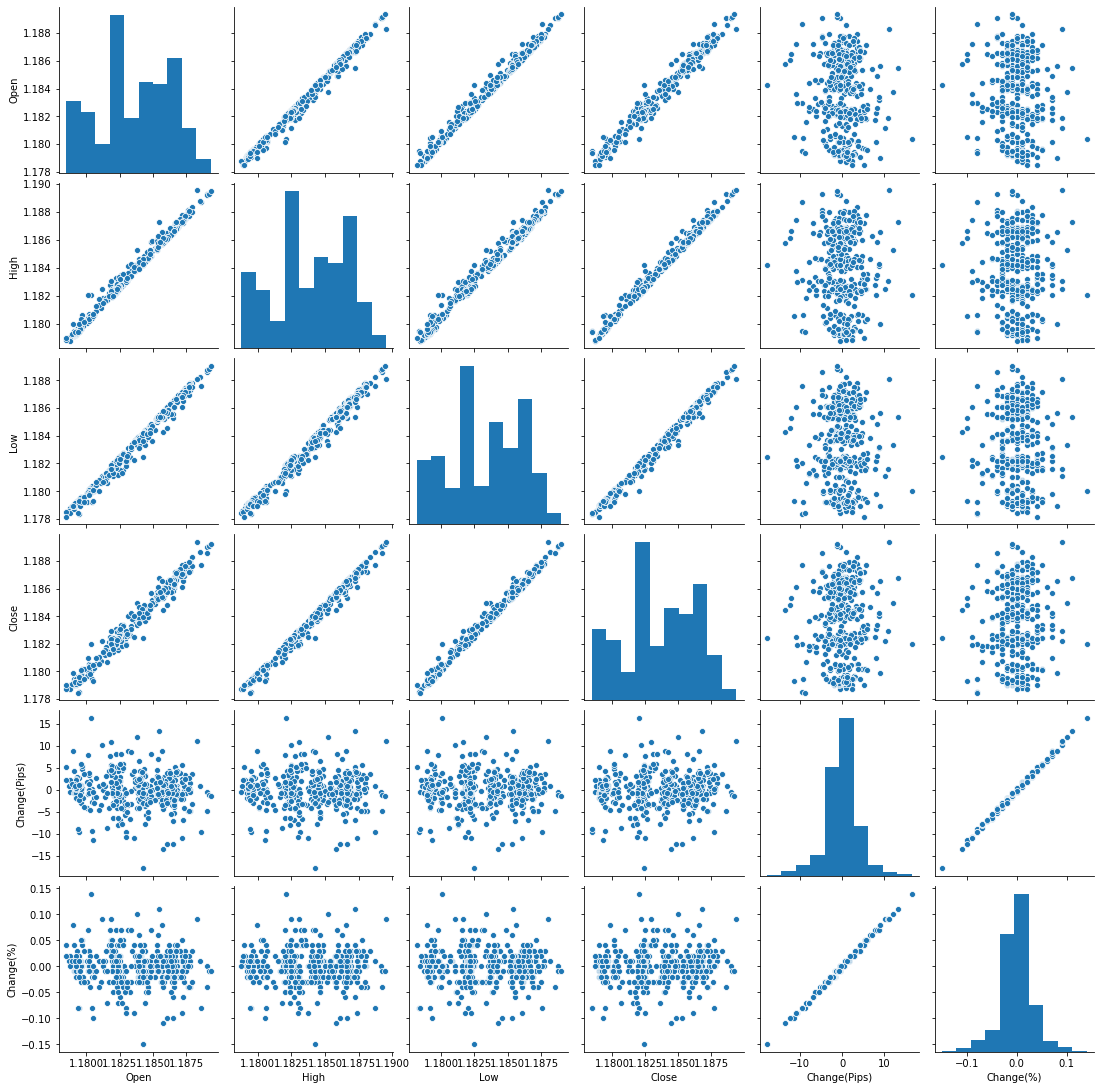

In [29]:
sns.set_style('darkgrid')
sns.pairplot(euru)

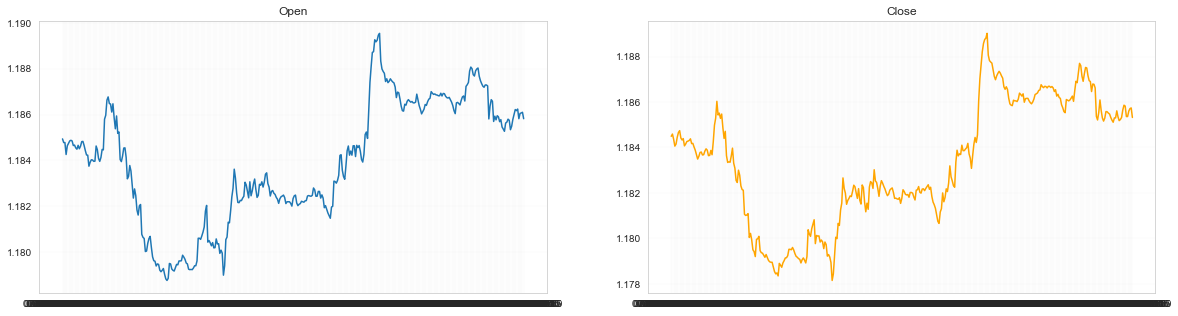

In [53]:
x2= euru['Date']
y2= euru['High']
z2= euru['Low']

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
      
axes[0].plot(x2, y2)
axes[0].set_title("Open")
axes[0].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

axes[1].plot(x2, z2,color = 'orange')
axes[1].set_title("Close");
axes[1].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

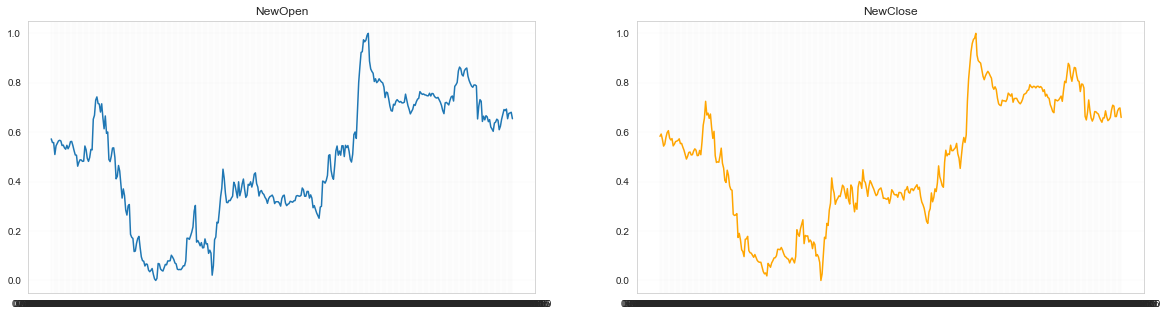

In [54]:
x5= eurj['Date']
y5= dataframe2['NewHigh']
z5= dataframe2['NewLow']

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
      
axes[0].plot(x5, y5)
axes[0].set_title("NewOpen")
axes[0].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

axes[1].plot(x5, z5, color = 'orange')
axes[1].set_title("NewClose");
axes[1].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

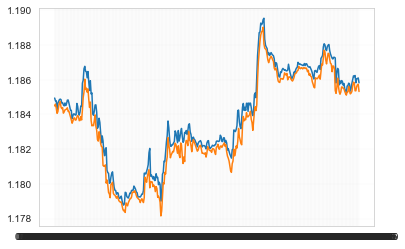

<Figure size 2160x576 with 0 Axes>

In [55]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,8))
ax.plot(x2,y2, x2,z2)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

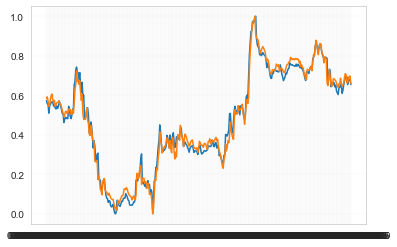

<Figure size 2160x576 with 0 Axes>

In [56]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,8))
ax.plot(x5,y5, x5,z5)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

Text(0.5, 1.0, 'EURUSD Historical Data Correlation')

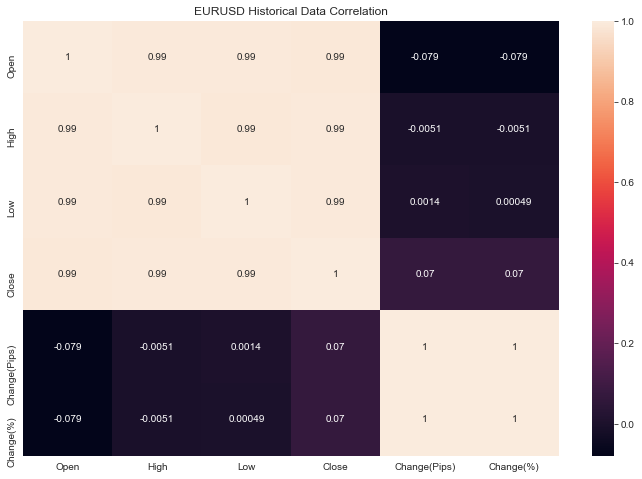

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(euru.corr(),annot=True )
plt.title('EURUSD Historical Data Correlation')

In [58]:
fig = px.line(euru, x='Date', y='High')
fig.update_xaxes(rangeslider_visible=True)

In [59]:
fig = px.line(euru, x='Date', y='Low')
fig.update_xaxes(rangeslider_visible=True)

In [60]:
usdj = pd.read_csv('USDJPY_historical_data.csv', skiprows=1, index_col=False)

In [61]:
usdj.head()

Date     Open     High      Low    Close  Change(Pips)  \
0  07/09/2021 00:00  109.806  109.878  109.791  109.839           3.3   
1  07/08/2021 23:45  109.826  109.845  109.778  109.803          -2.3   
2  07/08/2021 23:30  109.818  109.833  109.807  109.822           0.4   
3  07/08/2021 23:15  109.817  109.828  109.808  109.810          -0.7   
4  07/08/2021 23:00  109.778  109.825  109.776  109.815           3.7   

   Change(%)  
0       0.03  
1      -0.02  
2       0.00  
3      -0.01  
4       0.03

In [62]:
usdj.head(3)

Date     Open     High      Low    Close  Change(Pips)  \
0  07/09/2021 00:00  109.806  109.878  109.791  109.839           3.3   
1  07/08/2021 23:45  109.826  109.845  109.778  109.803          -2.3   
2  07/08/2021 23:30  109.818  109.833  109.807  109.822           0.4   

   Change(%)  
0       0.03  
1      -0.02  
2       0.00

In [63]:
usdj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          385 non-null    object 
 1   Open          385 non-null    float64
 2   High          385 non-null    float64
 3   Low           385 non-null    float64
 4   Close         385 non-null    float64
 5   Change(Pips)  385 non-null    float64
 6   Change(%)     385 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.2+ KB


In [64]:
xtrain = usdj[['High', 'Low']]
ytrain = usdj['Change(Pips)']

In [65]:
scalar = MinMaxScaler()
scalar.fit(xtrain)
newdata3 = scalar.transform(xtrain)

In [66]:
newdata3

array([[0.17380353, 0.15841584],
       [0.15302267, 0.15037129],
       [0.14546599, 0.16831683],
       [0.14231738, 0.16893564],
       [0.14042821, 0.14913366],
       [0.12405542, 0.14851485],
       [0.11460957, 0.14418317],
       [0.11146096, 0.14294554],
       [0.11397985, 0.13366337],
       [0.09571788, 0.13180693],
       [0.09823678, 0.13242574],
       [0.09634761, 0.12128713],
       [0.08627204, 0.1095297 ],
       [0.10264484, 0.13799505],
       [0.10642317, 0.13799505],
       [0.10831234, 0.13861386],
       [0.11523929, 0.14294554],
       [0.13287154, 0.1460396 ],
       [0.14546599, 0.16831683],
       [0.14546599, 0.17141089],
       [0.14987406, 0.16522277],
       [0.14357683, 0.16336634],
       [0.16687657, 0.17883663],
       [0.15302267, 0.17636139],
       [0.15239295, 0.1720297 ],
       [0.15743073, 0.17388614],
       [0.16687657, 0.18502475],
       [0.14924433, 0.16089109],
       [0.12720403, 0.15408416],
       [0.14987406, 0.16336634],
       [0.

In [67]:
dataframe3 = pd.DataFrame(newdata3, columns=['NewHigh', 'NewLow'])
print(dataframe3)

      NewHigh    NewLow
0    0.173804  0.158416
1    0.153023  0.150371
2    0.145466  0.168317
3    0.142317  0.168936
4    0.140428  0.149134
..        ...       ...
380  0.979849  0.977104
381  1.000000  0.974629
382  0.995592  1.000000
383  0.993073  0.991955
384  0.997481  0.990718

[385 rows x 2 columns]


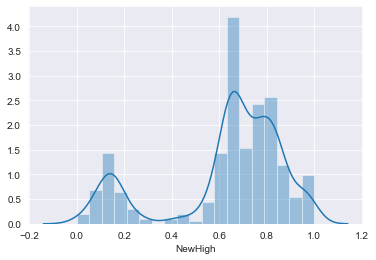

In [68]:
sns.set_style('darkgrid')
sns.distplot(dataframe3['NewHigh'])

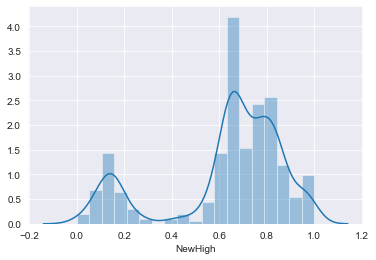

In [69]:
sns.set_style('darkgrid')
sns.distplot(dataframe3['NewHigh'])

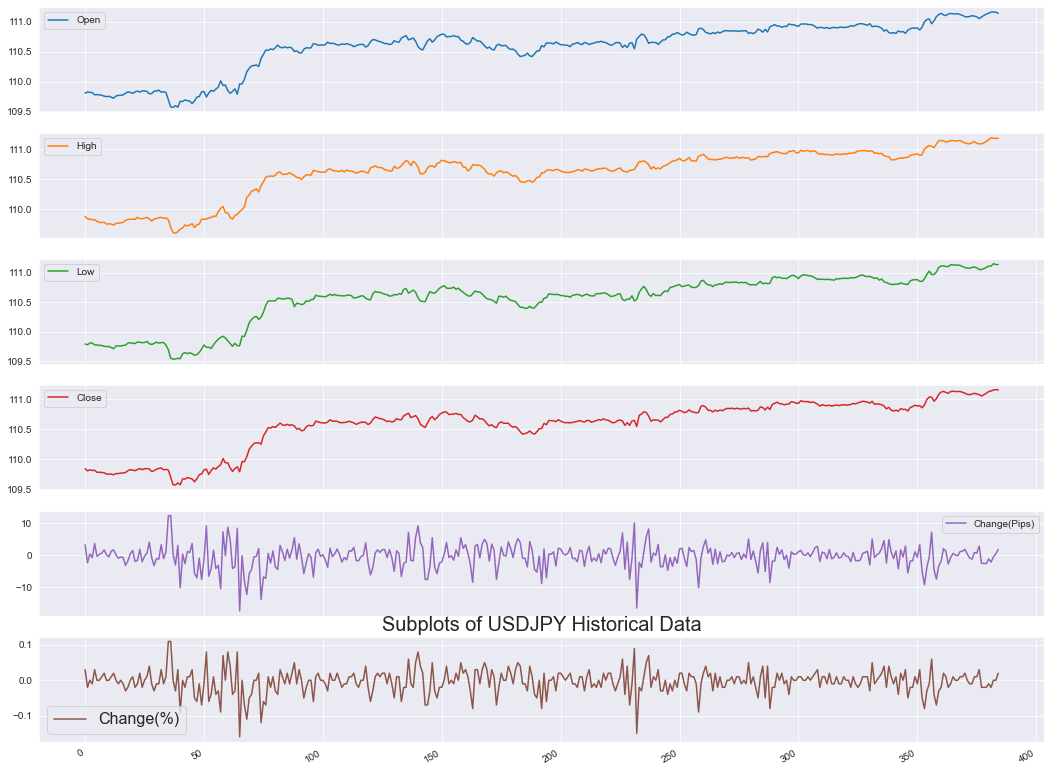

In [70]:
usdj.plot(subplots=True, figsize=(18,15))
plt.legend(fontsize=16)
plt.title('Subplots of USDJPY Historical Data', fontsize=20)
plt.show()

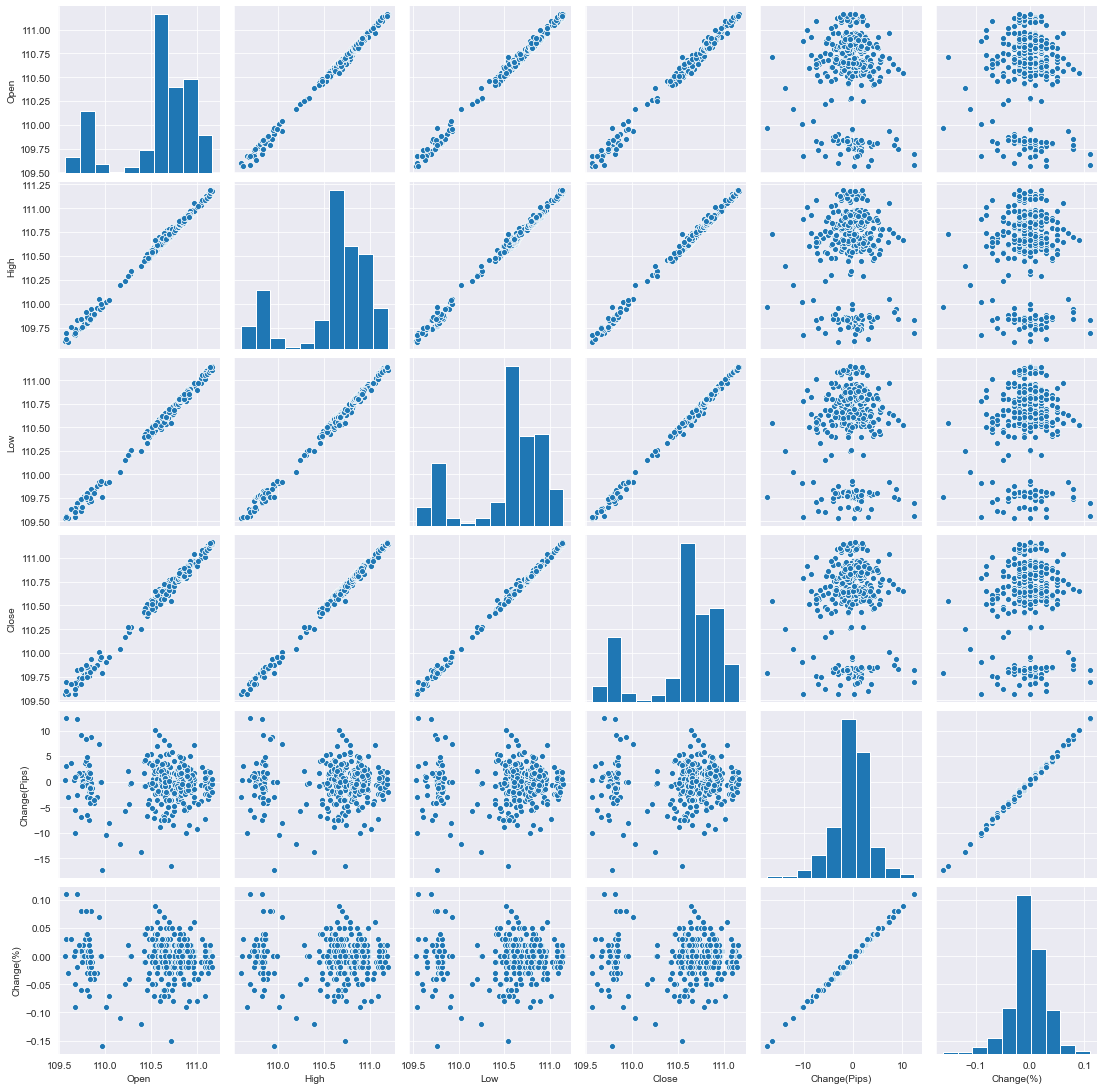

In [71]:
sns.pairplot(usdj)

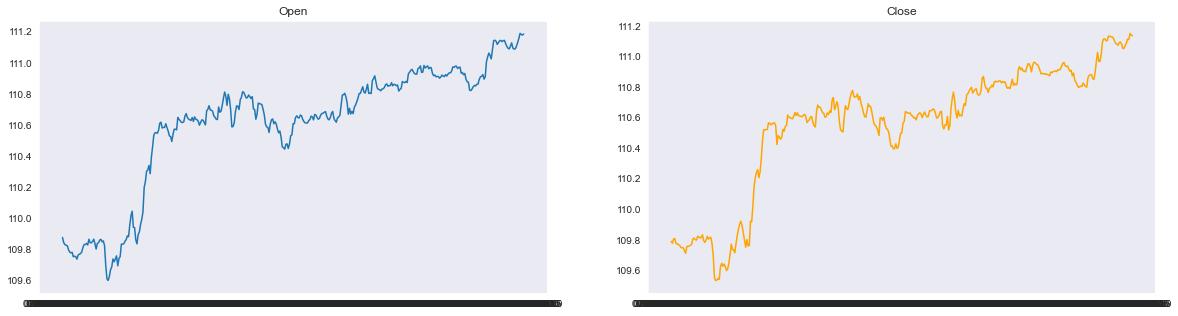

In [72]:
x3= usdj['Date']
y3= usdj['High']
z3= usdj['Low']

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
      
axes[0].plot(x3, y3)
axes[0].set_title("Open")
axes[0].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

axes[1].plot(x3, z3, color = 'orange')
axes[1].set_title("Close");
axes[1].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

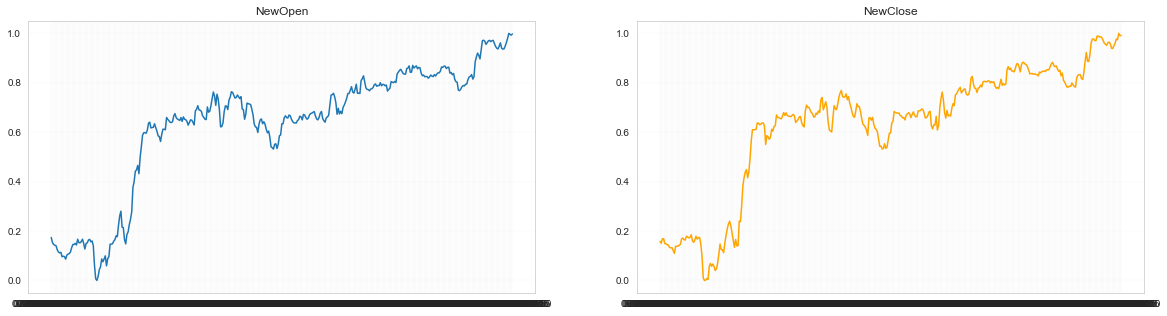

In [73]:
x6= eurj['Date']
y6= dataframe3['NewHigh']
z6= dataframe3['NewLow']

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
      
axes[0].plot(x6, y6)
axes[0].set_title("NewOpen")
axes[0].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

axes[1].plot(x6, z6, color = 'orange')
axes[1].set_title("NewClose");
axes[1].grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

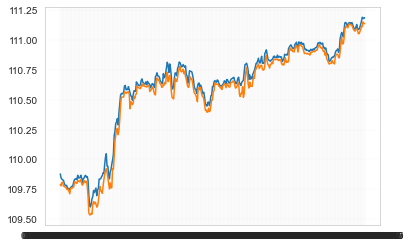

<Figure size 2160x576 with 0 Axes>

In [74]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,8))
ax.plot(x3,y3, x3,z3)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

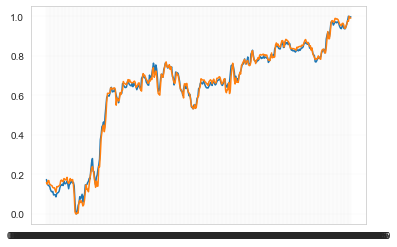

<Figure size 2160x576 with 0 Axes>

In [84]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,8))
ax.plot(x6,y6, x6,z6)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.2)

Text(0.5, 1.0, 'USDJPY Historical Data Correlation')

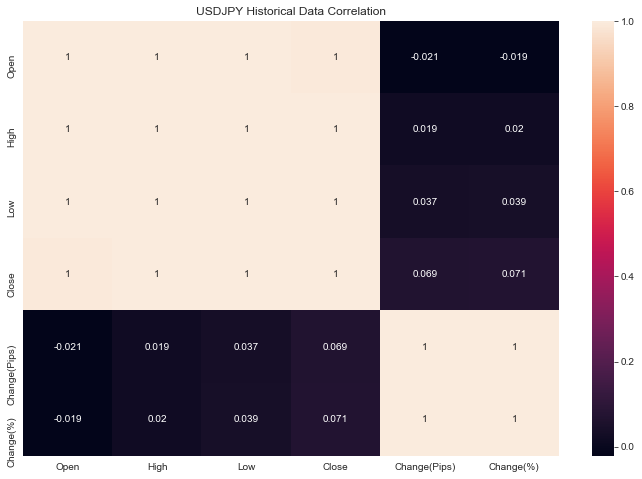

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(usdj.corr(),annot=True )
plt.title('USDJPY Historical Data Correlation')

In [77]:
fig = px.line(usdj, x='Date', y='High')
fig.update_xaxes(rangeslider_visible=True)

In [78]:
fig = px.line(usdj, x='Date', y='Low')
fig.update_xaxes(rangeslider_visible=True)

### So we come to a final conclusion that all three data sets whether normalised or not, perform same when compared between their highest value and lowest value. Also we cannot ignore the fact that there is no major difference between the un-normalised values and normalised values.

## THANK YOU